# Fare Prediction

The predicting of fare amount (inclusive of tolls) for a taxi ride, given the pickup and dropoff locations,the pickup date time and many other attributes given below. The description of all the attributes is given below. The target variable is “fare_amount “

Understand the data and do necessary data exploration and try creating new features and build a machine learning model to predict the fare amount.

**Variable's Description**
- TID:	            Unique ID
- Vendor_ID:	        Technology service vendor associated with cab company
- New_User:	        If a new user is taking the ride
- toll_price:	    toll tax amount
- tip_amount:	    tip given to driver (if any)
- tax:	            applicable tax
- pickup_timestamp:	time at which the ride started
- dropoff_timestamp:	time at which ride ended
- passenger_count:	number of passenger during the ride
- pickup_longitude:	pickup location longitude data
- pickup_latitude:	pickup location latitude data
- rate_category:	    category assigned to different rates at which a customer is charged
- store_and_fwd:	    if driver stored the data offline and later forwarded
- dropoff_longitude:	drop off longitude data
- dropoff_latitude:	drop off latitude data
- payment_type:	    payment mode used by the customer (CRD = Credit Card, CSH - Cash, DIS - dispute, NOC - No Charge, UNK - Unknown)
- surcharge:	        surchage applicable on the trip
- fare_amount:	    trip fare (to be predicted)

In [17]:
import pandas as pd
import numpy as np 
import warnings
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from math import sqrt, log
warnings.filterwarnings("ignore")

In [2]:
os.chdir("C:\\Users\\nayak\\Desktop\\INSOFE\\CSE_7305C\\Fare_Prediction")
data = pd.read_csv("train.csv", parse_dates = True, index_col = 0)
original = data.copy()

In [3]:
data.head()

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
TID,,,,,,,,,,,,,,,,,
AIX000345005,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0,10.0
AIX000345019,DST000401,NO,0.0,0.0,0.5,2015-04-18 20:29:50,2015-04-18 20:34:15,1,-73.995108,40.755005,1,N,-73.989492,40.745640,CSH,0.5,6.5
AIX000345026,DST000401,NO,0.0,NaN,0.5,2015-04-07 09:33:16,2015-04-07 09:42:16,1,-73.969530,40.790267,1,N,-73.987282,40.766865,CRD,0.0,10.6
AIX000345034,DST000401,NO,0.0,1.7,0.5,2015-04-23 23:22:45,2015-04-23 23:28:19,1,-73.977336,40.742819,1,N,-73.993617,40.721326,CRD,0.5,10.2
AIX000345052,DST000401,NO,0.0,1.0,0.5,2015-04-17 01:48:03,2015-04-17 01:53:32,1,-73.998653,40.715607,1,N,-73.988385,40.723130,CRD,0.5,8.5


In [4]:
print(data.shape)
#print(data.nunique())

(119386, 17)


In [5]:
data.dtypes

vendor_id              object
new_user               object
tolls_amount          float64
tip_amount            float64
mta_tax               float64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
surcharge             float64
fare_amount           float64
dtype: object

In [6]:
data.columns

Index(['vendor_id', 'new_user', 'tolls_amount', 'tip_amount', 'mta_tax',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'surcharge', 'fare_amount'],
      dtype='object')

In [7]:
data.describe()

,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,surcharge,fare_amount
count,119386.000000,107499.000000,119386.000000,119386.000000,115831.000000,116984.000000,119386.000000,119022.000000,118820.000000,112219.000000,119386.000000
mean,0.273719,1.556543,0.497952,1.722396,-72.611889,40.004528,1.034686,-72.624875,40.008286,0.317945,15.306157
std,1.283236,2.377861,0.033030,1.386579,9.948813,5.464661,0.273578,9.900074,5.452794,0.362051,12.733168
min,0.000000,0.000000,-0.500000,0.000000,-99.083115,-13.551884,0.000000,-99.083115,-13.551884,-1.000000,0.000000
25%,0.000000,0.000000,0.500000,1.000000,-73.991916,40.735188,1.000000,-73.991392,40.733734,0.000000,8.300000
50%,0.000000,1.000000,0.500000,1.000000,-73.981682,40.752767,1.000000,-73.979965,40.753029,0.000000,11.500000
75%,0.000000,2.100000,0.500000,2.000000,-73.966937,40.767167,1.000000,-73.962746,40.768330,0.500000,17.000000
max,30.000000,98.550000,0.500000,6.000000,0.000000,50.514841,6.000000,0.000000,42.253078,2.500000,480.000000


# Exploratory Data Analysis

In [15]:
data.fare_amount.apply(lambda x: log(x+1))

TID
AIX000345005     2.397895
AIX000345019     2.014903
AIX000345026     2.451005
AIX000345034     2.415914
AIX000345052     2.251292
                   ...   
AIX0002003050    2.718001
AIX0002003055    2.282382
AIX0002003072    4.036186
AIX0002003087    2.282382
AIX0002003095    2.756840
Name: fare_amount, Length: 119386, dtype: float64

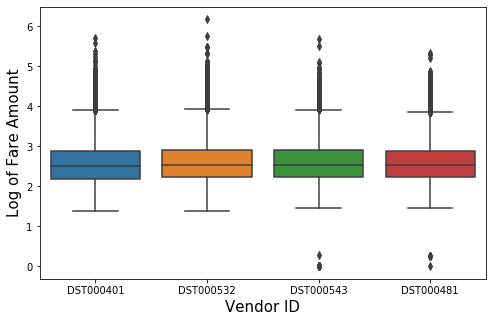

In [20]:
rcParams['figure.figsize'] = 8,5
sns.boxplot(x = data.vendor_id, y = data.fare_amount.apply(lambda x: log(x+1))) # +1 to avoid zeros in log
plt.xlabel("Vendor ID", fontsize = 15)
plt.ylabel("Log of Fare Amount", fontsize = 15)
plt.show()

We can see that most of the vendors charge between currency **$10^{0.5}$ = 3.16 to $10^{1.5}$ = 31.6** units for a ride

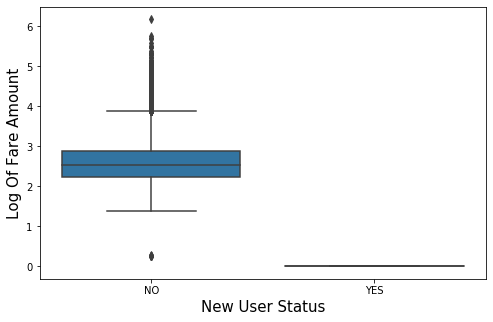

In [21]:
rcParams['figure.figsize'] = 8,5
sns.boxplot(x = data.new_user, y = data.fare_amount.apply(lambda x: log(x+1))) # +1 to avoid zeros in log
plt.xlabel("New User Status", fontsize = 15)
plt.ylabel("Log Of Fare Amount", fontsize = 15)
plt.show()

Most of the users seem to be existing users as per the plot. There should only be a few new users. Let us confirm our intuition with the above plot.

In [9]:
data.new_user.value_counts()

NO     119368
YES        17
Name: new_user, dtype: int64

It could be seen that out of almost a lakh users, only 17 are new users.

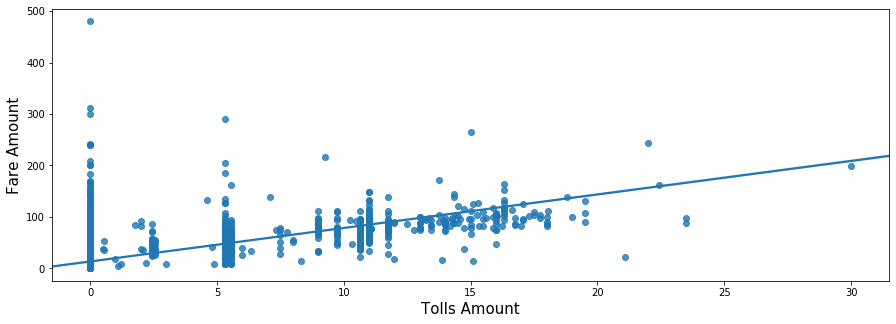

In [24]:
rcParams['figure.figsize'] = 15,5
sns.regplot(x = data.tolls_amount, y = data.fare_amount, data = data)
plt.xlabel("Tolls Amount", fontsize = 15)
plt.ylabel("Fare Amount", fontsize = 15)
plt.show()

It seems to be the case that people who pay higher tolls are likely to pay higher fares/bills which makes intuitive sense as well.

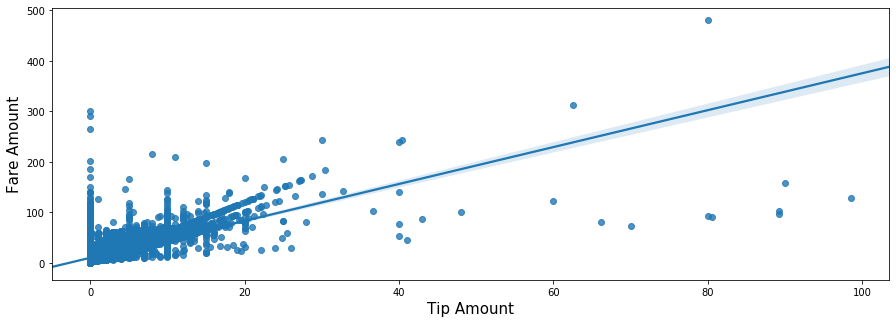

In [25]:
rcParams['figure.figsize'] = 15,5
sns.regplot(x = data.tip_amount, y = data.fare_amount, data = data)
plt.xlabel("Tip Amount", fontsize = 15)
plt.ylabel("Fare Amount", fontsize = 15)
plt.show()

Although almost everyone pays tips ranging from 0 to 25 currency units, those who tend to pay more than that are likely to recieve higher fare amounts. In general, there seems to be an increasing trend between fare amount and tip amount.

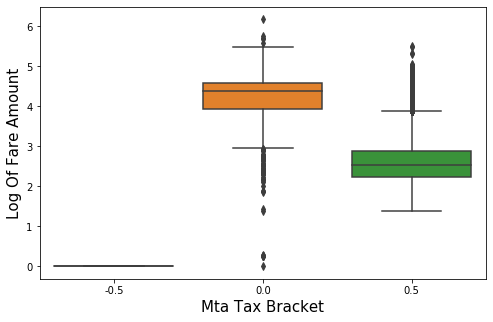

In [27]:
rcParams['figure.figsize'] = 8,5
sns.boxplot(x = data.mta_tax, y = data.fare_amount.apply(lambda x: log(x+1))) # +1 to avoid zeros in log
plt.xlabel("Mta Tax Bracket", fontsize = 15)
plt.ylabel("Log Of Fare Amount", fontsize = 15)
plt.show()

In [28]:
data.mta_tax.value_counts()

 0.5    118914
 0.0       455
-0.5        17
Name: mta_tax, dtype: int64

As seen from the above plot, there's a very little proportion of values which have -0.5 as their tax rates. They must be wrong entries as tax percentage is unlikely to be negative. Hence, in the later analysis, remove these values.

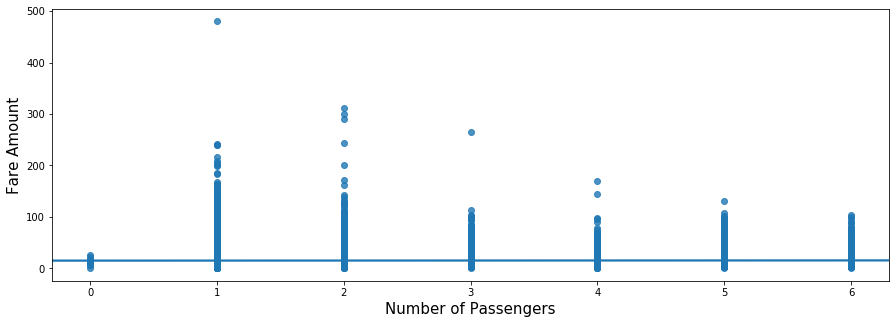

In [29]:
rcParams['figure.figsize'] = 15,5
sns.regplot(x = data.passenger_count, y = data.fare_amount, data = data)
plt.xlabel("Number of Passengers", fontsize = 15)
plt.ylabel("Fare Amount", fontsize = 15)
plt.show()

The smoothened line seems to suggest that the average fare paid by consumers is somewhere around 20-40 currency units. Also, it could be seen that the variance in prices is higher when the number of passengers is less as compared to when the number of passengers is more.

<img src="Locations.png" width=800 height=800>

<img src="LatLongImg.jpg" width=800 height=400>

A negative latitude means South of the Equator, and a negative longitude means West of the Prime Meridian (Refer the link below).

Looking at the two plots above, we can say that the data is concentrated around latitude = 40 and longitude = -75. Which is 40 degrees above the equator and 75 degrees to te left of prime meridian; Broadly speaking the locations here correspond to the midwest region of the United States. 

Also, we need to check for those values where lat = 0 and long = 0. If there are such values, we'll have to remove them since the intersection along equator and prime meridian lies in the waters close to Africa.

https://www.quora.com/What-does-negative-longitude-mean

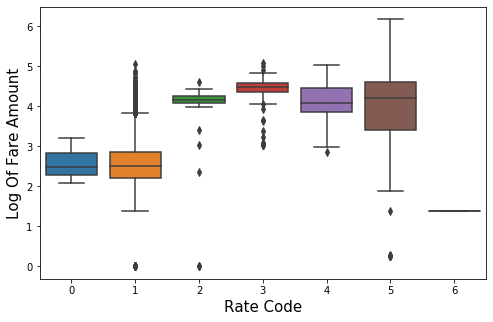

In [30]:
rcParams['figure.figsize'] = 8,5
sns.boxplot(x = data.rate_code, y = data.fare_amount.apply(lambda x: log(x+1))) # +1 to avoid zeros in log
plt.xlabel("Rate Code", fontsize = 15)
plt.ylabel("Log Of Fare Amount", fontsize = 15)
plt.show()

It can be seen above that in general as customers progress to higher rate codes, in general, the fare amount seems to increase (With some exception).

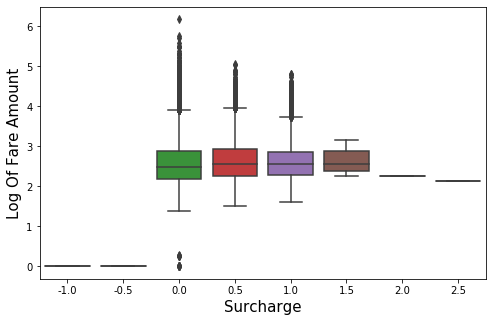

In [31]:
rcParams['figure.figsize'] = 8,5
sns.boxplot(x = data.surcharge, y = data.fare_amount.apply(lambda x: log(x+1))) # +1 to avoid zeros in log
plt.xlabel("Surcharge", fontsize = 15)
plt.ylabel("Log Of Fare Amount", fontsize = 15)
plt.show()

This plot shows there are some observations where surcharge has become negative. That cannot be possible since surcharge is some extra percent over your original fare charged to the user for a ride at opportunistic moments by the car-hire company; it cannot be negative which would mean the company has to exempt you from paying certain amount. That becomes discount and cannot be counted as surcharge. Hence remove the values where surcharge is negative.

In [11]:
# Percentage of NA Values
np.round(100 * data.isnull().sum()/data.shape[0], 2)

vendor_id              0.00
new_user               0.00
tolls_amount           0.00
tip_amount             9.96
mta_tax                0.00
pickup_datetime        0.00
dropoff_datetime       0.00
passenger_count        0.00
pickup_longitude       2.98
pickup_latitude        2.01
rate_code              0.00
store_and_fwd_flag    39.13
dropoff_longitude      0.30
dropoff_latitude       0.47
payment_type           0.00
surcharge              6.00
fare_amount            0.00
dtype: float64

# Thought Process

- tip_amount has a lot of NA values. We'll impute over that data using some measure of central tendency.

- But the number of latitudes and longitudes missing are only a few. So, remove those values straightaway. 

- New users are only 15 out of 119381 so, remove those records.

- Surcharge has -1, -0.5 values which don't make sense. Remove those records.

- Taxrate has -0.5 values. Remove these records.

- Keep the pickup_latitude, pickup_longitude, & remove dropoff_latitude, dropoff_longitude from the data by substituting it with distance between the points. Keep either one latitude or longitude to account for the location considerations.

- Remove dropoff_datetime by only taking duration into account. Keep pickup date to handle variation around the time of the day. Convert date into ddmmyyyy hhmmss format and then split them into separate columns.

In [12]:
d1 = data.pickup_latitude.isnull() == False 
d2 = data.pickup_longitude.isnull() == False 
d3 = data.dropoff_latitude.isnull() == False
d4 = data.dropoff_longitude.isnull() == False
d5 = data.new_user.isnull() == False
d6 = data.surcharge >= 0
d7 = data.mta_tax >= 0

data = data[d1 & d2 & d3 & d4 & d5 & d6 & d7]

In [13]:
data.shape

(105818, 17)

In [14]:
print(data.surcharge.unique())
print(data.mta_tax.unique())

[0.  0.5 1.  1.5 2.  2.5]
[0.5 0. ]


In [15]:
sum((data.dropoff_latitude == 0) & (data.dropoff_longitude == 0))

1938

In [16]:
sum((data.pickup_latitude == 0) & (data.pickup_longitude == 0))

1944

As we saw in our visual for the worldmap, (0,0) corresponds to a location somewhere in the mid-atlantic ocean. This is not a place where a terrestrial vehicle can traverse. So, let's remove these records from our dataset.

In [17]:
# Make a boolean list to index those positions where locations are feasible to reach. 
d8 = (data.pickup_latitude == 0) & (data.pickup_longitude == 0)
d8 = [not i for i in d8]
data = data[d8]
data.shape

(103874, 17)

In [18]:
d9 = (data.dropoff_latitude == 0) & (data.dropoff_longitude == 0)
d9 = [not i for i in d9]
data = data[d9]
data.shape

(103701, 17)

## Visualize all the pickup locations and dropoff locations

In [19]:
#gmap_pickup = gmplot.GoogleMapPlotter(data.pickup_latitude.mean(), data.pickup_longitude.mean(), 10)
#gmap_pickup.scatter(list(data.pickup_latitude), list(data.pickup_longitude), '# FF0000', size = 20, marker = True) 

In [20]:
#gmap_pickup.draw("C:\\Users\\nayak\\Desktop\\INSOFE\\CSE_7305C\\Fare_Prediction\\map_pickup.html" ) 

In [21]:
#gmap_dropoff = gmplot.GoogleMapPlotter(data.dropoff_latitude.mean(), data.dropoff_longitude.mean(), 10)
#gmap_dropoff.scatter(list(data.dropoff_latitude), list(data.dropoff_longitude), '# 0000FF', size = 20, marker = True) 

In [22]:
#gmap_dropoff.draw("C:\\Users\\nayak\\Desktop\\INSOFE\\CSE_7305C\\Fare_Prediction\\map_dropoff.html" ) 

## Distance
It would make sense to include the actual distance between the pickup and dropoff locations in the problem since going by common intuition, large distance rides cost more than small distance rides.

Used the site below to calculate distance given Latitude and Longitude of two points on the earth.

https://www.movable-type.co.uk/scripts/latlong.html

This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points (ignoring any hills they fly over, of course!).

**Haversine formula:	a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)**  

c = 2 ⋅ atan2( √a, √(1−a) )

d = R ⋅ c

where	φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
note that angles need to be in radians to pass to trig functions!

In [23]:
from math import pi, sqrt, cos, sin, atan2
def distance(lat1, lat2, long1, long2):
    lat1 = lat1 * pi/180
    lat2 = lat2 * pi/180
    long1 = long1 * pi/180
    long2 = long2 * pi/180
    R = 6371.009 # Radius of earth in kilometers
    
    dLat = lat1 - lat2
    dLong = long1 - long2
    a = sin(dLat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dLong/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    Distance = R * c
    return Distance

#     https://en.wikipedia.org/wiki/Geographical_distance
#     meanLat = (lat1 + lat2)/2
#     meanLong = (long1 + long2)/2
#     Distance = R * sqrt(dLat ** 2 + (cos(meanLat) * dLong) ** 2)
#     print(sqrt(dLat ** 2 + (cos(meanLat) * dLong) ** 2))

In [24]:
x = []
for i in range(0,data.shape[0]):
    x.append(distance(data.pickup_latitude[i], data.dropoff_latitude[i], 
                                          data.pickup_longitude[i], data.dropoff_longitude[i]))

In [25]:
data['Distance'] = x
#data.drop(columns = ['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude'], axis=1, inplace=True)

In [26]:
# %%R -i data -w 8 -h 6 -u in

# ggplot(data, aes(Distance, fare_amount)) + geom_point(alpha = 0.1) +  labs(x = "Distance", y = "Fare Amount") + 
#     theme_bw(base_size = 20, base_family = 'serif') + geom_smooth(method = 'lm', se = TRUE)

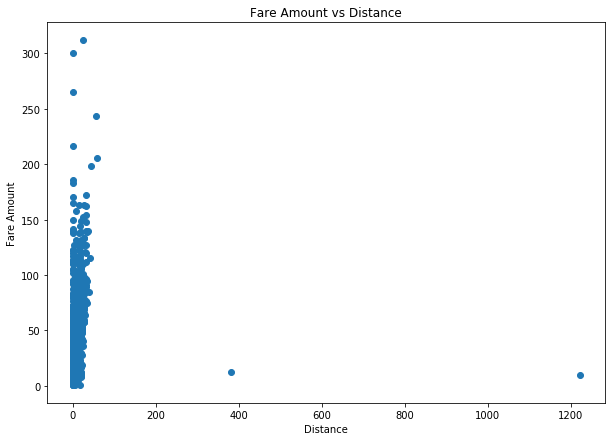

In [27]:
%matplotlib inline
plt.figure(figsize = (10,7))
plt.scatter(x = data.Distance,y = data.fare_amount)
plt.title('Fare Amount vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

It can be seen that there are a few points that have very high values for distance. These points need to be scrutinized.

In [28]:
data[data.Distance > 100]

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance
TID,,,,,,,,,,,,,,,,,,
AIX0001071884,DST000401,NO,0.0,0.0,0.5,2015-08-30 20:31:06,2015-08-30 20:41:15,2,-81.169787,50.514841,1,N,-73.992595,40.721399,CSH,0.5,10.0,1222.342172
AIX0001792537,DST000481,NO,0.0,0.0,0.5,2016-03-16 14:56:23,2016-03-16 15:15:48,1,-73.972717,40.758434,1,N,-78.107147,42.253078,CSH,0.0,12.8,382.241918


1. Ontario Canada to Manhattan, NY  on 30th August 2015 in 10 minutes and 9 seconds; Speed = 4583 mph

2. Manhattan NY to Belmont, NY on 16th March in 19 minutes 25 seconds; Speed = 716.7 mph

The locations for drop and pickup are perfectly fine but the speeds for the rides are unfathomable. To date there's no car which has been caapable of achieving that level of speed. The fastest any car as of 8th September 2019 has managed to achieve is 304 mph. Hence remove these records from our dataset and recheck.

https://gearpatrol.com/2019/09/08/bugatti-just-shattered-a-record-to-become-the-fastest-car-in-the-world/

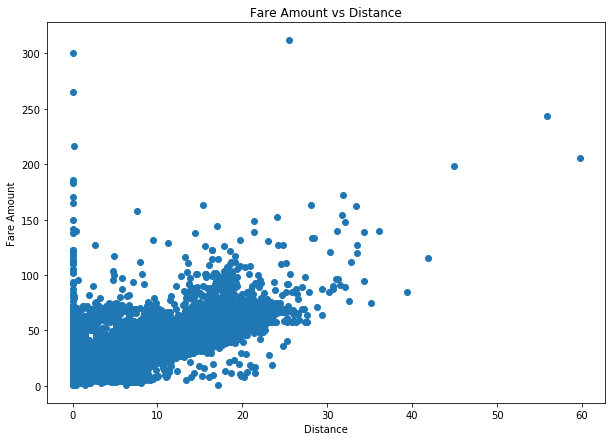

In [29]:
data = data[data.Distance <= 100]
plt.figure(figsize = (10,7))
plt.scatter(x = data.Distance,y = data.fare_amount)
plt.title('Fare Amount vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

This plot reveals that there are quite some rides where the distance covered was 0 km yet there's a non-zero fare that is charged to a customer. Let's subset those entries and check what's going on in them.

In [30]:
data[data.Distance == 0].head()

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance
TID,,,,,,,,,,,,,,,,,,
AIX000345796,DST000401,NO,0.0,NaN,0.5,2015-04-04 16:03:54,2015-04-04 16:12:26,1,-73.975435,40.728822,1,N,-73.975435,40.728822,CSH,1.0,8.5,0.0
AIX000349398,DST000532,NO,0.0,0.0,0.5,2015-04-27 17:05:00,2015-04-27 17:19:00,1,-73.782150,40.648390,1,NaN,-73.782150,40.648390,CSH,0.0,11.0,0.0
AIX000352502,DST000532,NO,0.0,0.0,0.5,2015-04-28 17:47:00,2015-04-28 17:55:00,5,-73.962583,40.781377,1,NaN,-73.962583,40.781377,CSH,1.0,9.0,0.0
AIX000359943,DST000401,NO,0.0,2.0,0.5,2015-04-09 05:41:27,2015-04-09 05:49:19,1,-73.983459,40.738651,1,N,-73.983459,40.738651,CRD,0.5,12.0,0.0
AIX000360267,DST000401,NO,0.0,0.0,0.5,2015-04-12 16:44:14,2015-04-12 16:51:51,1,-73.992577,40.751790,1,N,-73.992577,40.751790,CSH,0.0,6.5,0.0


If we view the dataset, we can see that when distance is 0, pickup and dropoff location's latitudes and longitudes match exactly. This could mostly either mean that the rider for some reason couldn't cater to the ridee or the ridee booked and cancelled his ride.

In either case, the rider mustn't pay for the ride since he's not availed the benifit of the service. This means that this data is probably mistakenly collected. Hence remove these datapoints for our analysis.

(103112, 18)


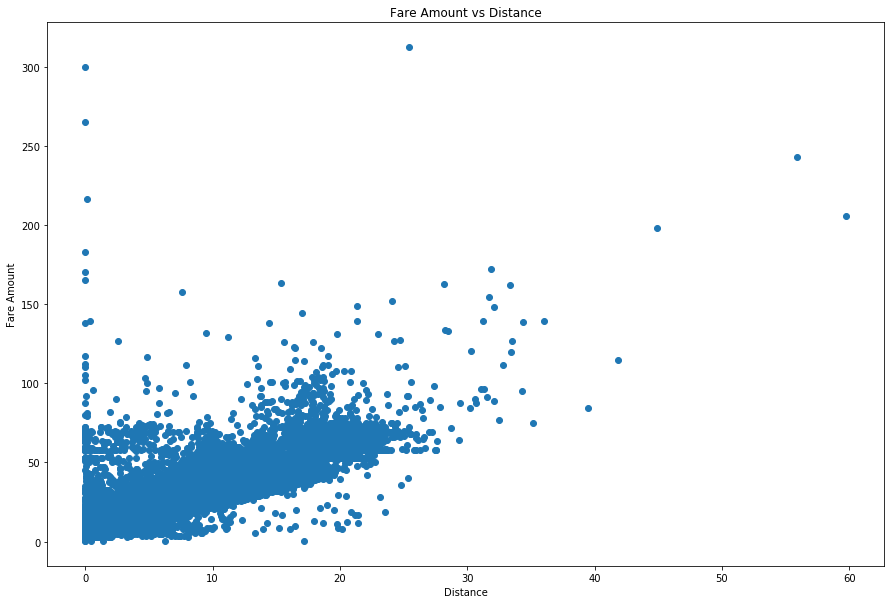

In [31]:
data = data[data.Distance != 0]
print(data.shape)
plt.figure(figsize = (15,10))
plt.scatter(x = data.Distance,y = data.fare_amount)
plt.title('Fare Amount vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

In [32]:
data[(data.pickup_latitude == data.dropoff_latitude) & (data.pickup_longitude == data.dropoff_longitude)]

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance
TID,,,,,,,,,,,,,,,,,,


In [33]:
data[data.Distance <= 0]

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance
TID,,,,,,,,,,,,,,,,,,


Now our dataset is clean and free from anomalies as far as distance is considered.

## Duration

The dataset has given the values for pickup_datetime and drop_off datetime. If we think from the perspective of how much time it took for a rider to complete his journey, we could say that more the ride time, more the fare amount. Let's check this hypoothesis and if it's met, let's use it as a predictor.

In [34]:
data['Duration'] = (pd.to_datetime(data.dropoff_datetime) - pd.to_datetime(data.pickup_datetime)).dt.total_seconds().astype(int)

In [35]:
data.head()

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance,Duration
TID,,,,,,,,,,,,,,,,,,,
AIX000345005,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0,10.0,1.628149,822
AIX000345019,DST000401,NO,0.0,0.0,0.5,2015-04-18 20:29:50,2015-04-18 20:34:15,1,-73.995108,40.755005,1,N,-73.989492,40.745640,CSH,0.5,6.5,1.143763,265
AIX000345026,DST000401,NO,0.0,NaN,0.5,2015-04-07 09:33:16,2015-04-07 09:42:16,1,-73.969530,40.790267,1,N,-73.987282,40.766865,CRD,0.0,10.6,3.000938,540
AIX000345034,DST000401,NO,0.0,1.7,0.5,2015-04-23 23:22:45,2015-04-23 23:28:19,1,-73.977336,40.742819,1,N,-73.993617,40.721326,CRD,0.5,10.2,2.755657,334
AIX000345052,DST000401,NO,0.0,1.0,0.5,2015-04-17 01:48:03,2015-04-17 01:53:32,1,-73.998653,40.715607,1,N,-73.988385,40.723130,CRD,0.5,8.5,1.203576,329


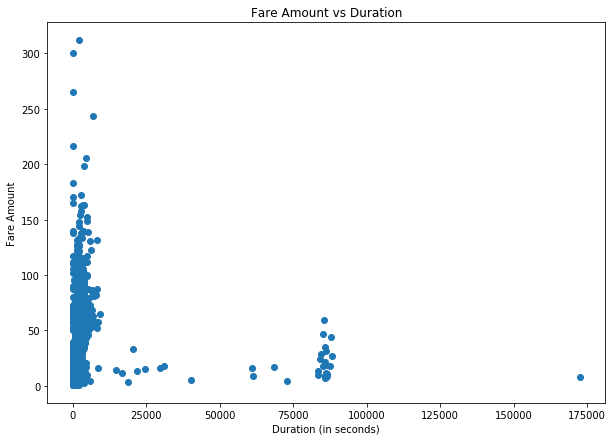

In [36]:
plt.figure(figsize = (10,7))
plt.scatter(x = data.Duration,y = data.fare_amount)
plt.title('Fare Amount vs Duration')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Fare Amount')
plt.show()

In a day we have got 24 * 60 * 60 = 86400 seconds. There's one point in the above plot which took almost 170000 seconds that is almost equal to two days. Let's check this point out.

In [37]:
data[data.Duration > 100000]

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance,Duration
TID,,,,,,,,,,,,,,,,,,,
AIX0001639379,DST000543,NO,0.0,0.0,0.5,2016-02-28 22:18:32,2016-03-01 22:13:16,1,-73.97924,40.757229,1,N,-73.984772,40.759331,CSH,0.5,7.8,0.521224,172484


For half a kilometer, the driver took more than two days. This is an anomaly since any average person can walk that much distance in almost 10 minutes or less. This point needs to be dropped from our analysis.

In [38]:
data = data[data.Duration <= 100000]

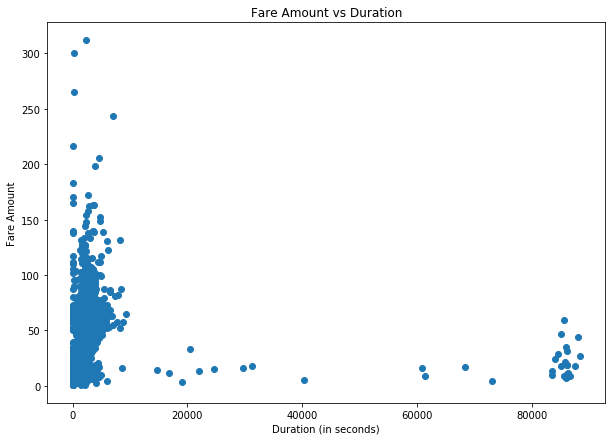

In [39]:
plt.figure(figsize = (10,7))
plt.scatter(x = data.Duration,y = data.fare_amount)
plt.title('Fare Amount vs Duration')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Fare Amount')
plt.show()

Out of curiousity, let us check those rides which cost more than 150 units of currency.

In [40]:
data[data.fare_amount > 150].head()

,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,Distance,Duration
TID,,,,,,,,,,,,,,,,,,,
AIX000365073,DST000401,NO,13.75,28.75,0.0,2015-04-13 18:46:02,2015-04-13 19:31:14,2,-74.005960,40.736007,5,N,-74.383856,40.739778,CRD,0.0,172.50,31.841547,2712
AIX000542861,DST000401,NO,0.00,25.70,0.5,2015-02-28 20:14:29,2015-02-28 20:54:14,1,-73.789905,40.646943,4,N,-73.484428,40.813393,CRD,0.5,154.20,31.703662,2385
AIX000671088,DST000401,NO,0.00,5.00,0.0,2015-06-09 17:52:04,2015-06-09 17:52:45,1,-73.982552,40.742431,5,N,-73.982557,40.742463,CRD,0.0,165.00,0.003583,41
AIX000870917,DST000532,NO,0.00,90.00,0.5,2015-05-09 03:30:00,2015-05-09 04:16:00,1,-73.674372,41.055127,1,NaN,-73.761352,41.035155,CRD,0.5,157.50,7.624931,2760
AIX000938756,DST000401,NO,9.25,8.00,0.0,2015-05-05 14:13:47,2015-05-05 14:14:23,1,-73.567343,41.048300,5,N,-73.567266,41.049584,CRD,0.0,216.25,0.142920,36


Except from the graph, there's no real anomaly here. It could be the case that these select few cars are luxury cars or something.

## Dealing with datetime.

We can drop the time for drop-off and keep the time for pickup. We can store date separately as day, month and year and for time we can do as below.

Add a column which captures what time of the day it is. i.e. Morning, Evening or Night. Let's arbitrarily define the steps as 6 am to 12 noon, 12 noon to 12 am and 12 am to 6 am respectively and see the variation.

In [41]:
data['pickup_day'] = pd.to_datetime(data.dropoff_datetime).dt.day
data['pickup_month'] = pd.to_datetime(data.dropoff_datetime).dt.month
data['pickup_year'] = pd.to_datetime(data.dropoff_datetime).dt.year

In [42]:
data['time_of_day'] = pd.cut(pd.to_datetime(data.dropoff_datetime).dt.hour, [-float('inf'), 8, 14, float('inf')])

In [43]:
data.time_of_day.value_counts()

(14.0, inf]    50246
(8.0, 14.0]    29445
(-inf, 8.0]    23420
Name: time_of_day, dtype: int64

In [44]:
data.nunique()

vendor_id                  4
new_user                   1
tolls_amount              83
tip_amount               989
mta_tax                    2
pickup_datetime       100154
dropoff_datetime      100143
passenger_count            7
pickup_longitude       48155
pickup_latitude        59181
rate_code                  7
store_and_fwd_flag         2
dropoff_longitude      51450
dropoff_latitude       62817
payment_type               5
surcharge                  6
fare_amount             2584
Distance              103107
Duration                3444
pickup_day                31
pickup_month              12
pickup_year                2
time_of_day                3
dtype: int64

In [45]:
data1 = data.copy()

## Removing unwanted columns

- dropoff_latitude, dropoff_latitude: Since we've already taken pickup lats and longs and distances, we don't need dropoff lats and longs.

- pickup_datetime, dropoff_datetime: Since we've already taken pickup_datetime's day, month and year and also the duration of the ride, dropoff_datetime won't add any new information

- store_and_fwd_flag: It has more unknowns than knowns and it is not clear what the column means for the user. So, drop that column for our analysis.

- new_user: Since there's only one level in this category, it doesn't make sense to include it anyway in our analysis.

In [46]:
cols_to_drop = ['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag','dropoff_longitude','dropoff_latitude', 'new_user']
data = data.drop(columns = cols_to_drop, axis = 1)

In [47]:
data.columns

Index(['vendor_id', 'tolls_amount', 'tip_amount', 'mta_tax', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'rate_code', 'payment_type',
       'surcharge', 'fare_amount', 'Distance', 'Duration', 'pickup_day',
       'pickup_month', 'pickup_year', 'time_of_day'],
      dtype='object')

In [48]:
np.round(100 * data.isnull().sum()/data.shape[0],3)

vendor_id           0.000
tolls_amount        0.000
tip_amount          9.924
mta_tax             0.000
passenger_count     0.000
pickup_longitude    0.000
pickup_latitude     0.000
rate_code           0.000
payment_type        0.000
surcharge           0.000
fare_amount         0.000
Distance            0.000
Duration            0.000
pickup_day          0.000
pickup_month        0.000
pickup_year         0.000
time_of_day         0.000
dtype: float64

For the tip amount, we need to impute the data since there are almost 10% missing values. We will do a central imputation on the same after doing a train test split later on.

# One hot encoding for categorical variables

In [49]:
cat_cols = ['vendor_id', 'mta_tax', 'rate_code', 'payment_type', 'time_of_day']
num_cols = []
for i in data.columns:
    if not i in cat_cols and i != 'fare_amount':
        num_cols.append(i)     
num_cols

['tolls_amount',
 'tip_amount',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'surcharge',
 'Distance',
 'Duration',
 'pickup_day',
 'pickup_month',
 'pickup_year']

In [50]:
data = pd.get_dummies(data = data, columns = cat_cols, drop_first = True)

In [51]:
data.columns

Index(['tolls_amount', 'tip_amount', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'surcharge', 'fare_amount', 'Distance', 'Duration',
       'pickup_day', 'pickup_month', 'pickup_year', 'vendor_id_DST000481',
       'vendor_id_DST000532', 'vendor_id_DST000543', 'mta_tax_0.5',
       'rate_code_1', 'rate_code_2', 'rate_code_3', 'rate_code_4',
       'rate_code_5', 'rate_code_6', 'payment_type_CSH', 'payment_type_DIS',
       'payment_type_NOC', 'payment_type_UNK', 'time_of_day_(8.0, 14.0]',
       'time_of_day_(14.0, inf]'],
      dtype='object')

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

y = data['fare_amount']
X = data.drop(columns = ['fare_amount'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 725)

# Impute 

In [53]:
from sklearn.preprocessing import Imputer
median_imputer = Imputer(missing_values = np.nan, strategy = 'median')
median_imputer.fit(X_train)

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values=nan, strategy='median', verbose=0)

In [54]:
X_train = pd.DataFrame(median_imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(median_imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Standardize

In [55]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(X_train[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
X_train[num_cols] = SS.transform(X_train[num_cols])
X_test[num_cols] = SS.transform(X_test[num_cols])

In [57]:
X_train.head()

,tolls_amount,tip_amount,passenger_count,pickup_longitude,pickup_latitude,surcharge,Distance,Duration,pickup_day,pickup_month,...,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK,"time_of_day_(8.0, 14.0]","time_of_day_(14.0, inf]"
TID,,,,,,,,,,,,,,,,,,,,,
AIX000631357,3.967616,0.676166,-0.522856,1.512773,-3.451986,-0.878236,4.488572,1.228420,-1.626584,-1.210202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AIX0001999788,-0.212758,-0.669905,-0.522856,-0.033399,0.441641,0.502437,-0.412484,-0.195087,-1.050370,-0.333390,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
AIX0001496204,-0.212758,0.227476,-0.522856,-0.084475,-0.082134,0.502437,0.119161,0.469301,1.369730,-1.210202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AIX0001808590,-0.212758,0.254397,-0.522856,-0.161418,-0.751105,-0.878236,-0.145040,-0.152490,-1.511341,-0.625660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIX0001745390,-0.212758,0.927433,-0.522856,0.198692,1.700093,1.883110,0.324899,0.283018,1.600216,-0.625660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
X_test.head()

,tolls_amount,tip_amount,passenger_count,pickup_longitude,pickup_latitude,surcharge,Distance,Duration,pickup_day,pickup_month,...,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK,"time_of_day_(8.0, 14.0]","time_of_day_(14.0, inf]"
TID,,,,,,,,,,,,,,,,,,,,,
AIX0001463559,-0.212758,2.022238,-0.522856,-0.104075,-0.821874,-0.878236,2.202835,0.274753,0.908759,2.004777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AIX0001395386,-0.212758,1.035119,-0.522856,-0.018996,1.218060,-0.878236,0.518743,0.312900,0.793516,1.712506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AIX0001094836,-0.212758,-0.669905,-0.522856,0.007239,1.048489,-0.878236,-0.284673,-0.155033,1.484973,0.835694,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
AIX0001447056,-0.212758,-0.669905,-0.522856,-0.172594,-0.877974,-0.878236,0.431349,0.427340,0.332544,2.004777,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
AIX0001711720,-0.212758,-0.669905,0.195488,0.195691,1.839700,-0.878236,1.025941,0.184473,1.254487,-0.917931,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Simple Linear Regression

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [60]:
linreg = LR.fit(X_train, y_train)

Linear_regression_coeffs = pd.DataFrame({"Coefficient Name":X_train.columns, "Slope":np.round(linreg.coef_,3)})
# print('linear model coeff (w):\n {}\n'
#      .format(linreg.coef_))
print(Linear_regression_coeffs)
print('\nlinear model intercept (b): {:.3f}\n'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}\n'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

           Coefficient Name   Slope
0              tolls_amount   2.059
1                tip_amount   3.154
2           passenger_count   0.014
3          pickup_longitude  -0.018
4           pickup_latitude  -0.055
5                 surcharge   0.328
6                  Distance   7.882
7                  Duration   0.725
8                pickup_day   0.038
9              pickup_month   0.145
10              pickup_year   0.585
11      vendor_id_DST000481  -0.902
12      vendor_id_DST000532   0.137
13      vendor_id_DST000543  -0.834
14              mta_tax_0.5  -4.282
15              rate_code_1  -0.260
16              rate_code_2   0.637
17              rate_code_3  10.050
18              rate_code_4  10.530
19              rate_code_5  34.433
20              rate_code_6  -2.136
21         payment_type_CSH   0.429
22         payment_type_DIS   2.576
23         payment_type_NOC   0.569
24         payment_type_UNK  -0.260
25  time_of_day_(8.0, 14.0]   1.255
26  time_of_day_(14.0, inf] 

In [61]:
ypred_LR = LR.predict(X_test)
#LRacc = accuracy_score(y_true = y_test, y_pred = ypred_LR)
LRMSE = mean_squared_error(y_true = y_test, y_pred = ypred_LR)
LRMAE = mean_absolute_error(y_true = y_test, y_pred = ypred_LR)
LRScores = [LRMSE, LRMAE]

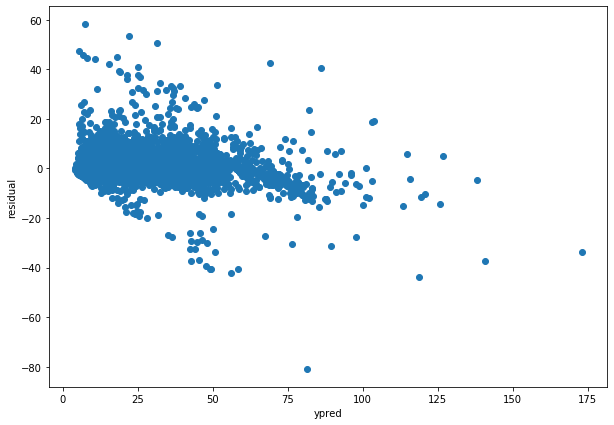

In [62]:
# Error Plot for Linear Regression
y_pred = linreg.predict(X_test)
del_y = y_test - y_pred

plt.figure(figsize=(10,7))
plt.scatter(x = y_pred, y = del_y)

plt.xlabel("ypred")
plt.ylabel("residual")
plt.show()

## Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
results = []
for i in list(np.logspace(-5, 5, 20)):
    linearRidge = Ridge(alpha = i).fit(X_train, y_train)
    train_acc = linearRidge.score(X_train, y_train)
    test_acc = linearRidge.score(X_test, y_test)
    results.append([i, train_acc, test_acc])

table = pd.DataFrame(results, columns=['Alpha', 'Train_R2', 'Test_R2'])
print(table.head(10))
print()
print(table[table.Test_R2 == table.Test_R2.max()])

      Alpha  Train_R2   Test_R2
0  0.000010  0.896525  0.910652
1  0.000034  0.896525  0.910652
2  0.000113  0.896525  0.910652
3  0.000379  0.896525  0.910652
4  0.001274  0.896525  0.910652
5  0.004281  0.896525  0.910652
6  0.014384  0.896525  0.910653
7  0.048329  0.896525  0.910656
8  0.162378  0.896524  0.910662
9  0.545559  0.896519  0.910675

         Alpha  Train_R2   Test_R2
14  233.572147  0.893412  0.912624


In [66]:
RR = Ridge(alpha = 233.572147).fit(X_train, y_train)
ypred_RR = RR.predict(X_test)
RRMSE = mean_squared_error(y_true = y_test, y_pred = ypred_RR)
RRMAE = mean_absolute_error(y_true = y_test, y_pred = ypred_RR)
RidgeScores = [RRMSE, RRMAE]

## Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

for i in list(np.logspace(-5, 5, 20)):
    linearLasso = Lasso(alpha = i, max_iter= 10000).fit(X_train, y_train)
    train_acc = linearLasso.score(X_train, y_train)
    test_acc = linearLasso.score(X_test, y_test)
    results.append([i, train_acc, test_acc])

table = pd.DataFrame(results, columns=['Alpha', 'Train_R2', 'Test_R2'])
print(table.head(10))
print()
print(table[table.Test_R2 == table.Test_R2.max()])

      Alpha  Train_R2   Test_R2
0  0.000010  0.896525  0.910652
1  0.000034  0.896525  0.910652
2  0.000113  0.896525  0.910652
3  0.000379  0.896525  0.910652
4  0.001274  0.896525  0.910652
5  0.004281  0.896525  0.910652
6  0.014384  0.896525  0.910653
7  0.048329  0.896525  0.910656
8  0.162378  0.896524  0.910662
9  0.545559  0.896519  0.910675

         Alpha  Train_R2   Test_R2
14  233.572147  0.893412  0.912624


In [68]:
LasR = Lasso(alpha = 0.014384).fit(X_train, y_train)
ypred_LasR = LasR.predict(X_test)
LasMSE = mean_squared_error(y_true = y_test, y_pred = ypred_LasR)
LasMAE = mean_absolute_error(y_true = y_test, y_pred = ypred_LasR)
LasScores = [LasMSE, LasMAE]

## Decision Trees

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

DR = DecisionTreeRegressor(criterion = "mse", max_depth = 8)

# params = {'criterion': ['mse', 'mae'],
#               'max_depth': [5,10,20,30,40],
#               'min_samples_split': [0.01,0.001]}

# GSCV = GridSearchCV(estimator = DR, param_grid = params, cv = 3, scoring = "neg_mean_squared_error")
DR.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [70]:
pd.DataFrame({'Importances':np.round(DR.feature_importances_,3)}, index = X_train.columns).sort_values(by = ['Importances'], ascending = False)

,Importances
Distance,0.600
Duration,0.162
rate_code_1,0.110
tip_amount,0.087
rate_code_2,0.013
tolls_amount,0.009
pickup_day,0.008
pickup_latitude,0.005
pickup_longitude,0.002
payment_type_CSH,0.001


In [71]:
# print(GSCV.best_params_)
# print(GSCV.best_estimator_)

In [72]:
ypred_DT = DR.predict(X_test)
MAE_DT = mean_absolute_error(y_true = y_test, y_pred = ypred_DT)
MSE_DT = mean_squared_error(y_true = y_test, y_pred = ypred_DT)
DT_scores = [MSE_DT, MAE_DT]

In [73]:
Performance = pd.DataFrame([LRScores, RidgeScores, LasScores, DT_scores], columns = ['MSE', 'MAE'], index = ['Linear', 'Ridge', 'Lasso', 'Dec Tree'])
Performance['RMSE'] = Performance['MSE'].apply(lambda x: sqrt(x))
Performance

,MSE,MAE,RMSE
Linear,13.258627,2.116824,3.641240
Ridge,12.965918,2.125066,3.600822
Lasso,13.101742,2.124896,3.619633
Dec Tree,8.155726,1.355624,2.855823


## Alternate Approach 

Let us take data1 and keep the dropoff_latitude, dropoff_longitude, and let's break the dropoff_datetime into month, year and day and check how it improves/decreases the performance. 

In [74]:
data2 = data1.copy()

In [75]:
data1 = data2.copy()

In [76]:
data1.columns

Index(['vendor_id', 'new_user', 'tolls_amount', 'tip_amount', 'mta_tax',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'surcharge', 'fare_amount', 'Distance', 'Duration',
       'pickup_day', 'pickup_month', 'pickup_year', 'time_of_day'],
      dtype='object')

In [77]:
data1['dropoff_day'] = pd.to_datetime(data1.dropoff_datetime).dt.day
data1['dropoff_month'] = pd.to_datetime(data1.dropoff_datetime).dt.month
data1['dropoff_year'] = pd.to_datetime(data1.dropoff_datetime).dt.year

In [78]:
data1.drop(['new_user','pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], axis = 1, inplace = True)

In [79]:
cat_cols1 = cat_cols
num_cols1 = []
for i in data1.columns:
    if not i in cat_cols1:
        num_cols1.append(i)

In [80]:
num_cols1.remove('fare_amount')

In [81]:
data1 = pd.get_dummies(data = data1, columns = cat_cols1, drop_first=True)

In [82]:
X = data1.drop(columns = ['fare_amount'], axis = 1)
y = data1.fare_amount
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 986, test_size = 0.2)

In [83]:
X_train.head()

,tolls_amount,tip_amount,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,surcharge,Distance,Duration,...,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK,"time_of_day_(8.0, 14.0]","time_of_day_(14.0, inf]"
TID,,,,,,,,,,,,,,,,,,,,,
AIX0001325176,0.0,0.0,1,-73.994248,40.719590,-73.991720,40.749202,0.0,3.299591,600,...,0,0,0,0,1,0,0,0,0,1
AIX0001206222,0.0,1.0,5,-73.975107,40.758805,-73.954653,40.788412,0.5,3.715491,480,...,0,0,0,0,0,0,0,0,0,1
AIX0001742393,0.0,3.8,1,-73.995407,40.724926,-73.954689,40.707455,0.0,3.943471,1629,...,0,0,0,0,0,0,0,0,0,1
AIX0001745540,0.0,0.0,1,-73.982246,40.766338,-73.951515,40.769333,0.5,2.609358,684,...,0,0,0,0,1,0,0,0,0,1
AIX0001189122,0.0,0.0,1,-73.782859,40.643847,-73.782858,40.643830,0.0,0.001892,4,...,0,0,0,0,0,0,0,0,0,0


In [84]:
medianImputer = Imputer(missing_values = np.nan, strategy="median")
medianImputer.fit(X_train)

C:\Users\nayak\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values=nan, strategy='median', verbose=0)

In [85]:
len(X_test.columns)

32

In [86]:
X_train = pd.DataFrame(medianImputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(medianImputer.transform(X_test), columns=X_train.columns, index=X_test.index)

In [87]:
std = StandardScaler()
std.fit(X_train[num_cols1])
X_train[num_cols1] = std.transform(X_train[num_cols1])
X_test[num_cols1] = std.transform(X_test[num_cols1])

In [88]:
X_train.head()

,tolls_amount,tip_amount,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,surcharge,Distance,Duration,...,rate_code_3,rate_code_4,rate_code_5,rate_code_6,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK,"time_of_day_(8.0, 14.0]","time_of_day_(14.0, inf]"
TID,,,,,,,,,,,,,,,,,,,,,
AIX0001325176,-0.213682,-0.674826,-0.522315,-0.155891,-1.014989,-0.140358,-0.059698,-0.879515,-0.025723,-0.148238,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
AIX0001206222,-0.213682,-0.222756,2.354459,-0.005335,0.263564,0.152204,1.081589,0.502458,0.085673,-0.227472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AIX0001742393,-0.213682,1.043042,-0.522315,-0.165008,-0.841016,0.151919,-1.274839,-0.879515,0.146736,0.531192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AIX0001745540,-0.213682,-0.674826,-0.522315,-0.061491,0.509179,0.176970,0.526253,0.502458,-0.210597,-0.092774,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
AIX0001189122,-0.213682,-0.674826,-0.522315,1.506817,-3.484488,1.508141,-3.126765,-0.879515,-0.908990,-0.541767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)
ypredLR = linreg.predict(X_test)

LRMAE = mean_absolute_error(y_true = y_test, y_pred = ypredLR)
LRMSE = mean_squared_error(y_true = y_test, y_pred = ypredLR)
LRScores = [LRMSE, LRMAE]

In [90]:
Linear_regression_coeffs = pd.DataFrame({"Coefficient Name":X_train.columns, "Slope":np.round(linreg.coef_,3)})
# print('linear model coeff (w):\n {}\n'
#      .format(linreg.coef_))
print(Linear_regression_coeffs)
print('\nlinear model intercept (b): {:.3f}\n'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}\n'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

           Coefficient Name         Slope
0              tolls_amount  2.095000e+00
1                tip_amount  3.120000e+00
2           passenger_count  6.000000e-03
3          pickup_longitude  1.400000e-01
4           pickup_latitude  1.320000e-01
5         dropoff_longitude -2.730000e-01
6          dropoff_latitude -4.920000e-01
7                 surcharge  3.290000e-01
8                  Distance  7.876000e+00
9                  Duration  7.350000e-01
10               pickup_day -9.089264e+12
11             pickup_month  2.792137e+11
12              pickup_year  2.356595e+13
13              dropoff_day  9.089264e+12
14            dropoff_month -2.792137e+11
15             dropoff_year -2.356595e+13
16      vendor_id_DST000481 -1.560000e+00
17      vendor_id_DST000532  1.200000e-01
18      vendor_id_DST000543 -1.496000e+00
19              mta_tax_0.5 -5.789000e+00
20              rate_code_1 -1.578000e+00
21              rate_code_2 -1.074000e+00
22              rate_code_3  5.552

## Ridge Regression 

In [91]:
from sklearn.linear_model import Ridge
results = []
for i in list(np.logspace(-5, 5, 20)):
    linearRidge = Ridge(alpha = i).fit(X_train, y_train)
    train_acc = linearRidge.score(X_train, y_train)
    test_acc = linearRidge.score(X_test, y_test)
    results.append([i, train_acc, test_acc])

table = pd.DataFrame(results, columns=['Alpha', 'Train_R2', 'Test_R2'])
print(table.head(10))
print()
print(table[table.Test_R2 == table.Test_R2.max()])

      Alpha  Train_R2   Test_R2
0  0.000010  0.900039  0.901502
1  0.000034  0.900039  0.901502
2  0.000113  0.900039  0.901502
3  0.000379  0.900039  0.901502
4  0.001274  0.900039  0.901502
5  0.004281  0.900039  0.901502
6  0.014384  0.900039  0.901502
7  0.048329  0.900039  0.901502
8  0.162378  0.900038  0.901501
9  0.545559  0.900035  0.901503

       Alpha  Train_R2   Test_R2
13  69.51928   0.89929  0.902429


In [92]:
RR = Ridge(alpha = 69.51928).fit(X_train, y_train)
ypred_RR = RR.predict(X_test)
RRMSE = mean_squared_error(y_true = y_test, y_pred = ypred_RR)
RRMAE = mean_absolute_error(y_true = y_test, y_pred = ypred_RR)
RidgeScores = [RRMSE, RRMAE]

## LASSO Regression 

In [93]:
from sklearn.linear_model import Lasso
results = []
for i in list(np.logspace(-5, 5, 20)):
    linearLasso = Lasso(alpha = i, max_iter= 10000).fit(X_train, y_train)
    train_acc = linearLasso.score(X_train, y_train)
    test_acc = linearLasso.score(X_test, y_test)
    results.append([i, train_acc, test_acc])

table = pd.DataFrame(results, columns=['Alpha', 'Train_R2', 'Test_R2'])
print(table.head(10))
print()
print(table[table.Test_R2 == table.Test_R2.max()])

      Alpha  Train_R2   Test_R2
0  0.000010  0.900039  0.901502
1  0.000034  0.900038  0.901501
2  0.000113  0.900035  0.901498
3  0.000379  0.900022  0.901505
4  0.001274  0.899971  0.901631
5  0.004281  0.899752  0.901713
6  0.014384  0.898693  0.901953
7  0.048329  0.889238  0.896163
8  0.162378  0.880961  0.889088
9  0.545559  0.876609  0.885514

      Alpha  Train_R2   Test_R2
6  0.014384  0.898693  0.901953


In [94]:
LasR = Lasso(alpha = 0.014384).fit(X_train, y_train)
ypred_LasR = LasR.predict(X_test)
LasMSE = mean_squared_error(y_true = y_test, y_pred = ypred_LasR)
LasMAE = mean_absolute_error(y_true = y_test, y_pred = ypred_LasR)
LasScores = [LasMSE, LasMAE]

## Decision Trees 

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

DR = DecisionTreeRegressor(criterion = "mse", max_depth = 9)

# params = {'criterion': ['mse', 'mae'],
#               'max_depth': [5,10,20,30,40],
#               'min_samples_split': [0.01,0.001]}

# GSCV = GridSearchCV(estimator = DR, param_grid = params, cv = 3, scoring = "neg_mean_squared_error")
DR.fit(X_train, y_train)

ypred_DT = DR.predict(X_test)
MAE_DT = mean_absolute_error(y_true = y_test, y_pred = ypred_DT)
MSE_DT = mean_squared_error(y_true = y_test, y_pred = ypred_DT)
DT_scores = [MSE_DT, MAE_DT]
pd.DataFrame({'Importances':np.round(DR.feature_importances_, 3)}, index = X_train.columns).sort_values(by = ['Importances'], ascending = False)

,Importances
Distance,0.600
Duration,0.158
rate_code_1,0.109
tip_amount,0.085
tolls_amount,0.014
rate_code_2,0.013
pickup_day,0.005
dropoff_longitude,0.004
payment_type_CSH,0.004
dropoff_latitude,0.002


## Stacking 

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
from mlxtend.regressor import StackingRegressor

lrS = LinearRegression()
rrS = Ridge(alpha = 69.51928)
lasrS = Lasso(alpha = 69.51928)
rf_Reg = RandomForestRegressor(random_state = 0)

stregr = StackingRegressor(regressors=[lrS, rrS, lasrS, rf_Reg], 
                           meta_regressor= rf_Reg)

stregr.fit(X_train, y_train)
y_pred_stack = stregr.predict(X_test)

## Performance with alternate approach

Includes dropoff_lat, dropoff_long and dropoff_day, month and year in addition to everything else in the first first approach

In [98]:
Performance1 = pd.DataFrame([LRScores, RidgeScores, LasScores, DT_scores], columns = ['MSE', 'MAE'], index = ['Linear', 'Ridge', 'Lasso', 'Dec Tree'])
Performance1['RMSE'] = Performance1['MSE'].apply(lambda x: sqrt(x))
Performance1

,MSE,MAE,RMSE
Linear,14.975586,2.115475,3.869830
Ridge,14.836041,2.116352,3.851758
Lasso,14.908355,2.121910,3.861134
Dec Tree,7.695420,1.214543,2.774062


## Performace with original approach 

In [99]:
Performance

,MSE,MAE,RMSE
Linear,13.258627,2.116824,3.641240
Ridge,12.965918,2.125066,3.600822
Lasso,13.101742,2.124896,3.619633
Dec Tree,8.155726,1.355624,2.855823


It can be seen that adding the data regarding dropoff after having both distances and duration in the dataset reduces the mse for linear regression. We can make sense of the result intuitively since we're adding columns which are mutually dependent on one another and that's going to worsen the performance of the regressors in any case. that's what we can observe from the two tables.

Decision Trees performed better with the latter approach but all the three regression methods performed better with the original approach. Decision trees being low bias, they can understand and build more rules if it has more features to predict better. That could be one of the reasons why this happened only with decision trees and not with the regression methods.